<a href="https://colab.research.google.com/github/Zoeb137/Oncology-drug-pricing-/blob/main/Drug_list_nme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dataset and packages


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df_nme = '/content/drive/My Drive/Thesis/drug_list_nme.xlsx'
df_nme = pd.read_excel(df_nme)

df_nme.head()

,ATC,Generic Name,Company,Product Name,MNF /MONTH,Pack Launch Date,LAUNCH MNF /MONTH,Patient population Treatment line,ASMR obtained,Number of patients concerned,Patient Number,Unmet need,NME,Orphan Status
0,L02BX03,ABIRATERONE,SANDOZ,ABIRATERONE,1060.20,2023-09-19,1060.20,First line\n\nBRCA1/2 gene mutations\n\nIn com...,IV,1 306 patients,1036.0,Partiellement couvert,0.0,NO
1,L01FX05,BRENTUXIMAB VEDOTIN,TAKEDA,ADCETRIS,9810.00,2013-07-05,11340.00,Rescue line\n\nCD30+,III,205 patients per year,205.0,NaN,NaN,YES
2,L01DB01,DOXORUBICIN,PFIZER,ADRIBLASTINE,15.57,2013-12-25,15.57,Monotherapy,V,NaN,NaN,NaN,NaN,NO
3,L01EG02,EVEROLIMUS,NOVARTIS,AFINITOR,1111.74,2010-03-17,3786.00,NaN,II,about 100 patients,100.0,NaN,NaN,NO
4,L01ED03,ALECTINIB,ROCHE,ALECENSA,4500.00,2021-05-01,4500.00,Second line\n\nALK mutation\n\nMonotherapy,IV,500 patients per year,500.0,Partiellement couvert,NaN,NO


In [ ]:
# Strip whitespace and convert to uppercase

df_nme['ASMR obtained'] = df_nme['ASMR obtained'].str.strip().str.upper()


# Redefine the mapping dictionary if necessary
roman_to_arabic_inverse = {'I': 5, 'II': 4, 'III': 3, 'IV': 2, 'V': 1}

df_nme['ASMR obtained'] = df_nme['ASMR obtained'].map(roman_to_arabic_inverse)
print(df_nme['ASMR obtained'])

0     2
1     3
2     1
3     4
4     2
     ..
81    3
82    2
83    1
84    3
85    3
Name: ASMR obtained, Length: 86, dtype: int64


In [ ]:
df_nme['Orphan Status'] = df_nme['Orphan Status'].map({'YES': 1, 'NO': 0})

print(df_nme[['Orphan Status']].head())

   Orphan Status
0              0
1              1
2              0
3              0
4              0


In [ ]:
import pandas as pd
import re
def has_treatment_line(text, line_name):
    if pd.isnull(text):
        return 0
    return 1 if re.search(fr"\b{line_name}\b", text, re.IGNORECASE) else 0

# Create binary columns for each treatment line
df_nme['First line'] = df_nme['Patient population Treatment line'].apply(lambda x: has_treatment_line(x, 'First line'))
df_nme['Second line'] = df_nme['Patient population Treatment line'].apply(lambda x: has_treatment_line(x, 'Second line'))
df_nme['Third line'] = df_nme['Patient population Treatment line'].apply(lambda x: has_treatment_line(x, 'Third line'))
df_nme['Rescue line'] = df_nme['Patient population Treatment line'].apply(lambda x: has_treatment_line(x, 'Rescue line'))

# Check the DataFrame
print(df_nme[['First line', 'Second line', 'Third line', 'Rescue line', ]].head())

   First line  Second line  Third line  Rescue line
0           1            0           0            0
1           0            0           0            1
2           0            0           0            0
3           0            0           0            0
4           0            1           0            0


In [ ]:
columns_to_drop = ['First line', 'Second line', 'Third line', 'Rescue line', 'NaN']

# Dropping duplicates - assuming the duplicates have the same names
# You may need to adjust the column names based on the actual names of the duplicate columns in your DataFrame
df_nme = df_nme.loc[:, ~df_nme.columns.duplicated()]

# Check the DataFrame
df_nme.head()

,ATC,Generic Name,Company,Product Name,MNF /MONTH,Pack Launch Date,LAUNCH MNF /MONTH,Patient population Treatment line,ASMR obtained,Number of patients concerned,Patient Number,Unmet need,NME,Orphan Status,First line,Second line,Third line,Rescue line
0,L02BX03,ABIRATERONE,SANDOZ,ABIRATERONE,1060.20,2023-09-19,1060.20,First line\n\nBRCA1/2 gene mutations\n\nIn com...,2,1 306 patients,1036.0,Partiellement couvert,0.0,0,1,0,0,0
1,L01FX05,BRENTUXIMAB VEDOTIN,TAKEDA,ADCETRIS,9810.00,2013-07-05,11340.00,Rescue line\n\nCD30+,3,205 patients per year,205.0,NaN,NaN,1,0,0,0,1
2,L01DB01,DOXORUBICIN,PFIZER,ADRIBLASTINE,15.57,2013-12-25,15.57,Monotherapy,1,NaN,NaN,NaN,NaN,0,0,0,0,0
3,L01EG02,EVEROLIMUS,NOVARTIS,AFINITOR,1111.74,2010-03-17,3786.00,NaN,4,about 100 patients,100.0,NaN,NaN,0,0,0,0,0
4,L01ED03,ALECTINIB,ROCHE,ALECENSA,4500.00,2021-05-01,4500.00,Second line\n\nALK mutation\n\nMonotherapy,2,500 patients per year,500.0,Partiellement couvert,NaN,0,0,1,0,0


In [ ]:
df_nme['Unmet Need Binary'] = df_nme['Unmet need'].apply(lambda x: 1 if x == 'Partiellement couvert' else 0)
print(df_nme['Unmet Need Binary'])

0     1
1     0
2     0
3     0
4     1
     ..
81    0
82    0
83    0
84    0
85    0
Name: Unmet Need Binary, Length: 86, dtype: int64


In [ ]:
# Convert 'LAUNCH MNF /MONTH' to numeric
df_nme['LAUNCH MNF /MONTH'] = pd.to_numeric(df_nme['LAUNCH MNF /MONTH'], errors='coerce')
df_nme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ATC                                86 non-null     object        
 1   Generic Name                       86 non-null     object        
 2   Company                            86 non-null     object        
 3   Product Name                       86 non-null     object        
 4   MNF /MONTH                         80 non-null     float64       
 5   Pack Launch Date                   86 non-null     datetime64[ns]
 6   LAUNCH MNF /MONTH                  86 non-null     float64       
 7   Patient population Treatment line  66 non-null     object        
 8   ASMR obtained                      86 non-null     int64         
 9   Number of patients concerned       62 non-null     object        
 10  Patient Number                     61 no

In [ ]:
new_df = df_nme[df_nme['NME'] != 0]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 1 to 85
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ATC                                66 non-null     object        
 1   Generic Name                       66 non-null     object        
 2   Company                            66 non-null     object        
 3   Product Name                       66 non-null     object        
 4   MNF /MONTH                         62 non-null     float64       
 5   Pack Launch Date                   66 non-null     datetime64[ns]
 6   LAUNCH MNF /MONTH                  66 non-null     float64       
 7   Patient population Treatment line  58 non-null     object        
 8   ASMR obtained                      66 non-null     int64         
 9   Number of patients concerned       58 non-null     object        
 10  Patient Number                     57 no

In [ ]:
new_df = new_df[new_df['LAUNCH MNF /MONTH'] <= 100000]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1 to 85
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ATC                                64 non-null     object        
 1   Generic Name                       64 non-null     object        
 2   Company                            64 non-null     object        
 3   Product Name                       64 non-null     object        
 4   MNF /MONTH                         62 non-null     float64       
 5   Pack Launch Date                   64 non-null     datetime64[ns]
 6   LAUNCH MNF /MONTH                  64 non-null     float64       
 7   Patient population Treatment line  56 non-null     object        
 8   ASMR obtained                      64 non-null     int64         
 9   Number of patients concerned       56 non-null     object        
 10  Patient Number                     55 no

In [ ]:
new_df = new_df.drop('NME', axis=1)

# EDA Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Descriptive Statistics:\n", new_df.describe())

Descriptive Statistics:
          MNF /MONTH  LAUNCH MNF /MONTH  ASMR obtained  Patient Number  \
count     62.000000          64.000000      64.000000       55.000000   
mean    5661.232903        6198.324844       1.812500     2633.900000   
std     8411.751307        8788.690938       0.870595     3867.583076   
min       15.570000          15.570000       1.000000       10.000000   
25%     1664.310000        2185.385000       1.000000      275.000000   
50%     3796.070000        4152.980000       2.000000     1271.000000   
75%     5967.882500        6238.767500       3.000000     2954.000000   
max    51600.000000       51600.000000       4.000000    21500.000000   

       Orphan Status  First line  Second line  Third line  Rescue line  \
count      64.000000   64.000000    64.000000   64.000000    64.000000   
mean        0.187500    0.296875     0.343750    0.203125     0.109375   
std         0.393398    0.460493     0.478714    0.405505     0.314576   
min         0.000000 

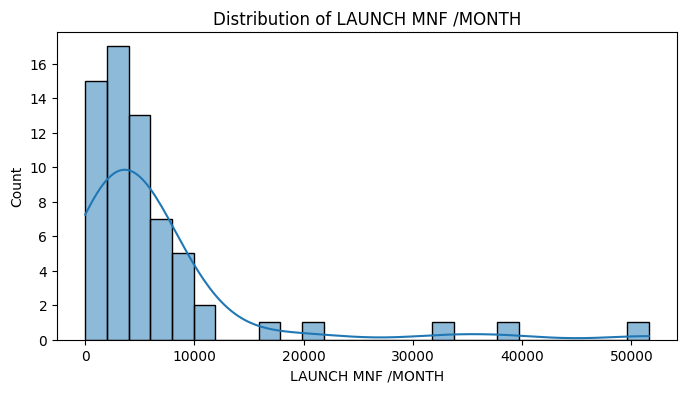

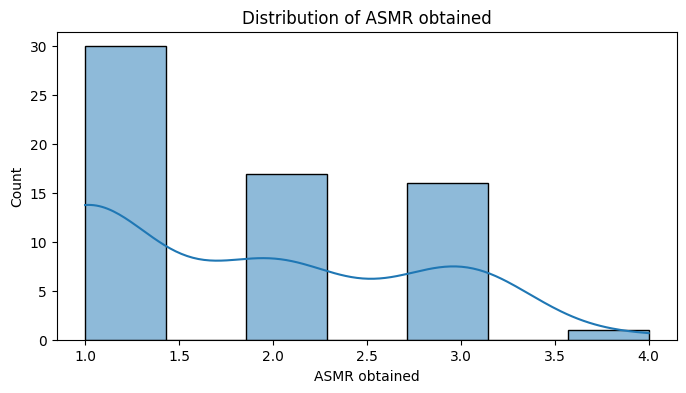

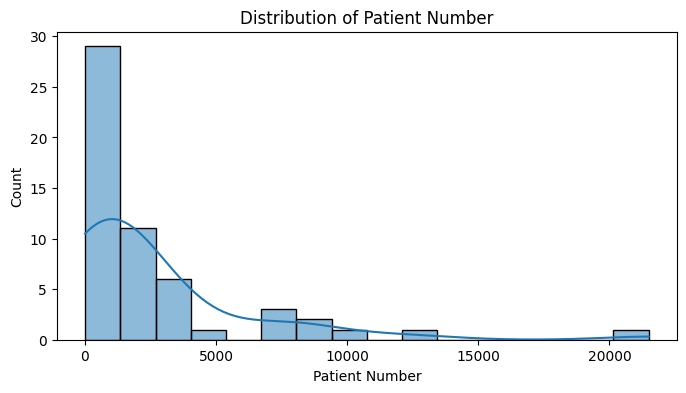

In [ ]:
numeric_vars = ['LAUNCH MNF /MONTH', 'ASMR obtained', 'Patient Number']
for var in numeric_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(new_df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

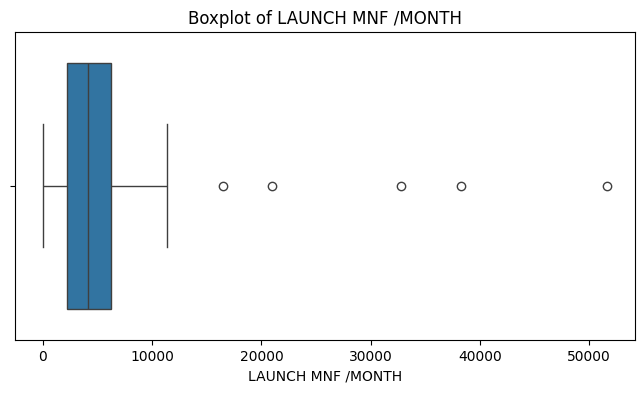

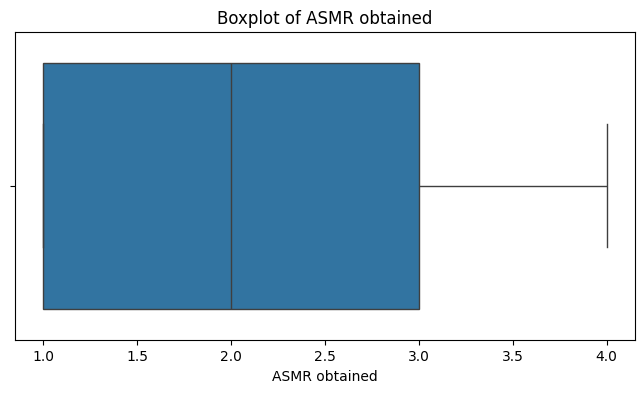

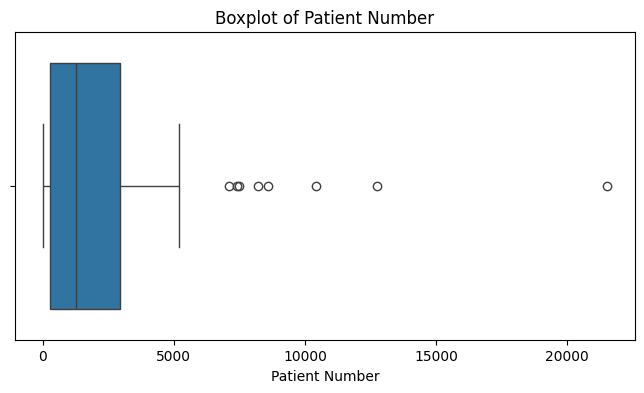

In [ ]:
for var in numeric_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=new_df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

<ipython-input-15-ba6ba97bf0ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


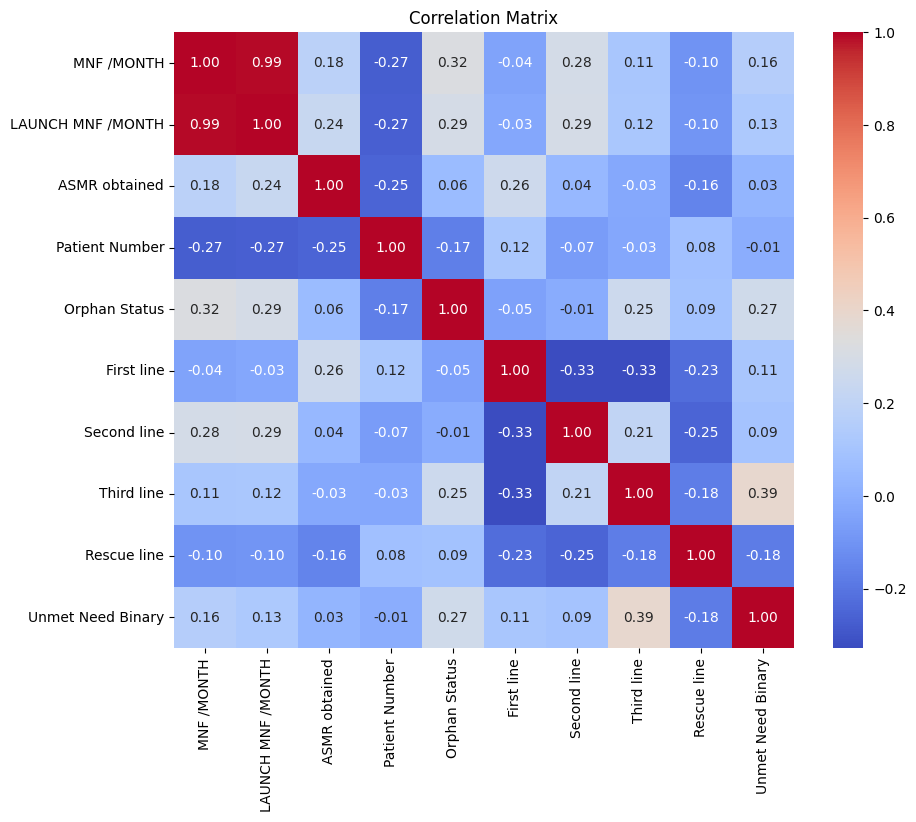

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

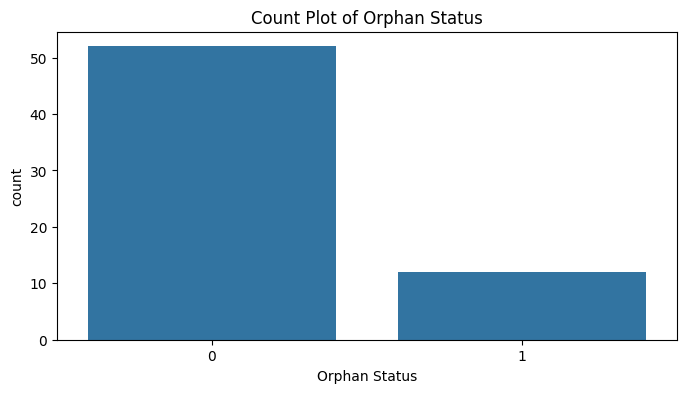

In [ ]:
categorical_vars = ['Orphan Status']
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=new_df[var])
    plt.title(f'Count Plot of {var}')
    plt.show()

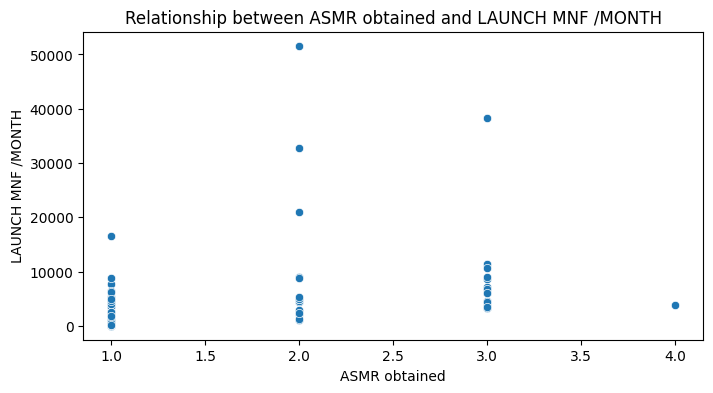

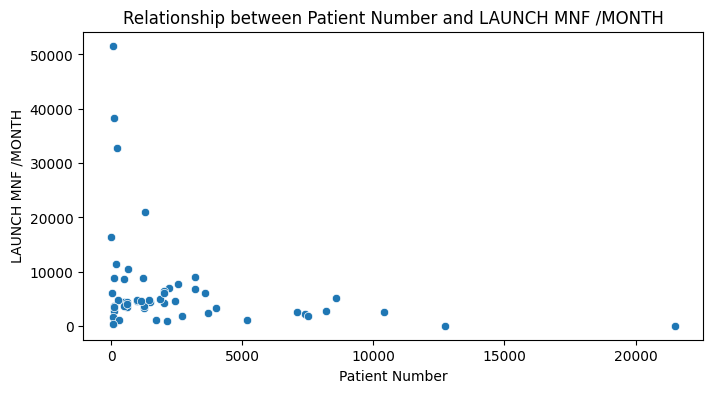

In [ ]:
for var in numeric_vars:
    if var != 'LAUNCH MNF /MONTH':  # Exclude plotting against itself
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=new_df[var], y=new_df['LAUNCH MNF /MONTH'])
        plt.title(f'Relationship between {var} and LAUNCH MNF /MONTH')
        plt.show()

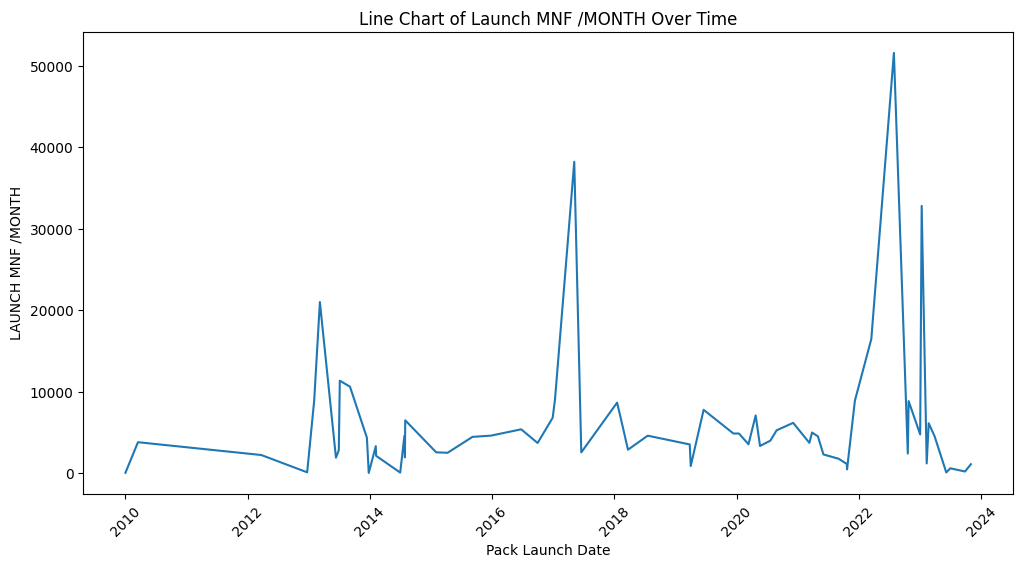

In [ ]:
new_df['Pack Launch Date'] = pd.to_datetime(new_df['Pack Launch Date'])

# Sorting the DataFrame by 'Pack Launch Date' for a proper chronological line plot
df_sorted = new_df.sort_values('Pack Launch Date')

# Creating the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Pack Launch Date', y='LAUNCH MNF /MONTH', data=df_sorted)

# Adding titles and labels
plt.title('Line Chart of Launch MNF /MONTH Over Time')
plt.xlabel('Pack Launch Date')
plt.ylabel('LAUNCH MNF /MONTH')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Group the data by 'ASMR obtained' and calculate statistical summaries
grouped_stats = new_df.groupby('ASMR obtained')['LAUNCH MNF /MONTH'].describe()

# Alternatively, if you want specific statistics:
# Calculate mean and median
mean_prices = new_df.groupby('ASMR obtained')['LAUNCH MNF /MONTH'].mean()
median_prices = new_df.groupby('ASMR obtained')['LAUNCH MNF /MONTH'].median()

# Calculate standard deviation
std_deviation = new_df.groupby('ASMR obtained')['LAUNCH MNF /MONTH'].std()

# Calculate min and max
min_prices = new_df.groupby('ASMR obtained')['LAUNCH MNF /MONTH'].min()
max_prices = new_df.groupby('ASMR obtained')['LAUNCH MNF /MONTH'].max()

# Print the comprehensive statistical summary
print("Comprehensive Statistical Summary by ASMR Rating:")
print(grouped_stats)

# Print specific statistics
print("\nMean Prices by ASMR Rating:")
print(mean_prices)
print("\nMedian Prices by ASMR Rating:")
print(median_prices)
print("\nStandard Deviation of Prices by ASMR Rating:")
print(std_deviation)
print("\nMinimum Prices by ASMR Rating:")
print(min_prices)
print("\nMaximum Prices by ASMR:")
print(max_prices)

Comprehensive Statistical Summary by ASMR Rating:
               count         mean           std      min        25%       50%  \
ASMR obtained                                                                   
1               30.0  3277.378333   3494.144300    15.57   649.2725  2382.895   
2               17.0  9667.715882  13502.385951  1079.64  2800.0000  4586.730   
3               16.0  8139.641875   8439.571253  3300.00  3702.7600  6106.490   
4                1.0  3786.000000           NaN  3786.00  3786.0000  3786.000   

                     75%       max  
ASMR obtained                       
1              4698.1075  16455.00  
2              8891.6700  51600.00  
3              8710.1850  38229.09  
4              3786.0000   3786.00  

Mean Prices by ASMR Rating:
ASMR obtained
1    3277.378333
2    9667.715882
3    8139.641875
4    3786.000000
Name: LAUNCH MNF /MONTH, dtype: float64

Median Prices by ASMR Rating:
ASMR obtained
1    2382.895
2    4586.730
3    6106.490
4  

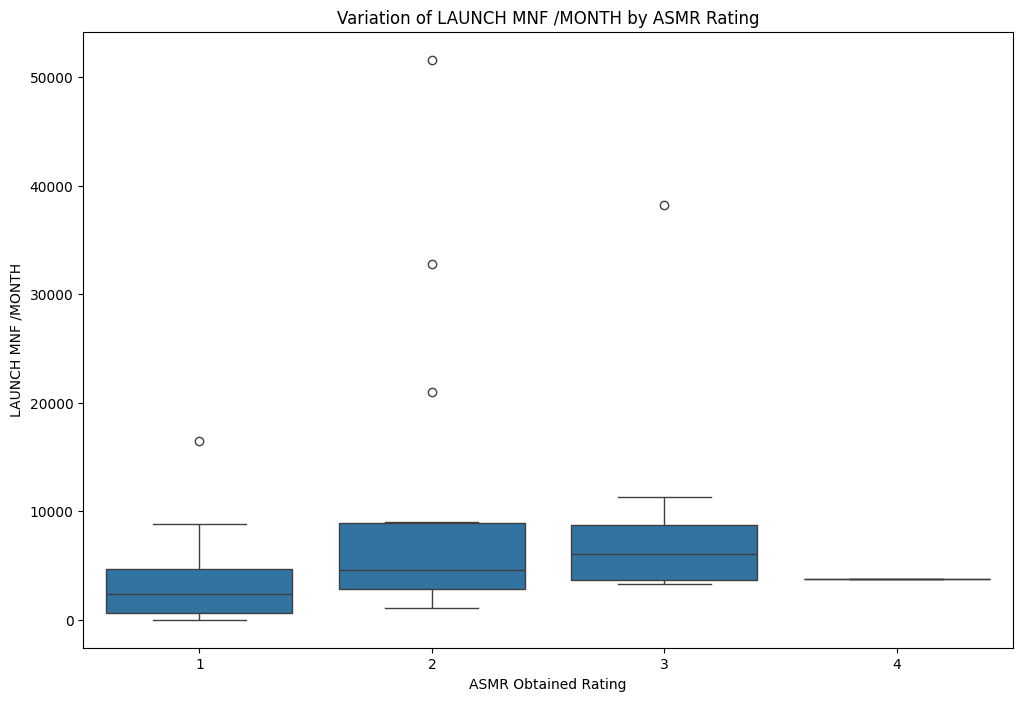

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to visualize the variation of LAUNCH MNF /MONTH by ASMR obtained rating

plt.figure(figsize=(12, 8))  # Set figure size for better visibility
sns.boxplot(x='ASMR obtained', y='LAUNCH MNF /MONTH', data=new_df)

plt.title('Variation of LAUNCH MNF /MONTH by ASMR Rating')
plt.xlabel('ASMR Obtained Rating')
plt.ylabel('LAUNCH MNF /MONTH')

# Show the plot
plt.show()

# Correlation Analysis

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Convert the columns to numeric, assuming NaN for non-numeric entries
new_df['ASMR obtained'] = pd.to_numeric(new_df['ASMR obtained'], errors='coerce')
new_df['LAUNCH MNF /MONTH'] = pd.to_numeric(new_df['LAUNCH MNF /MONTH'], errors='coerce')

# Drop rows where either column is NaN
new_df.dropna(subset=['ASMR obtained', 'LAUNCH MNF /MONTH'], inplace=True)

# Calculate Spearman rank correlation
spearman_corr, p_value = spearmanr(new_df['ASMR obtained'], new_df['LAUNCH MNF /MONTH'])

print(f"Spearman correlation coefficient between 'ASMR obtained' and 'LAUNCH MNF /MONTH': {spearman_corr}")
print(f"P-value: {p_value}")


Spearman correlation coefficient between 'ASMR obtained' and 'LAUNCH MNF /MONTH': 0.43458785506499226
P-value: 0.0003328941170303185


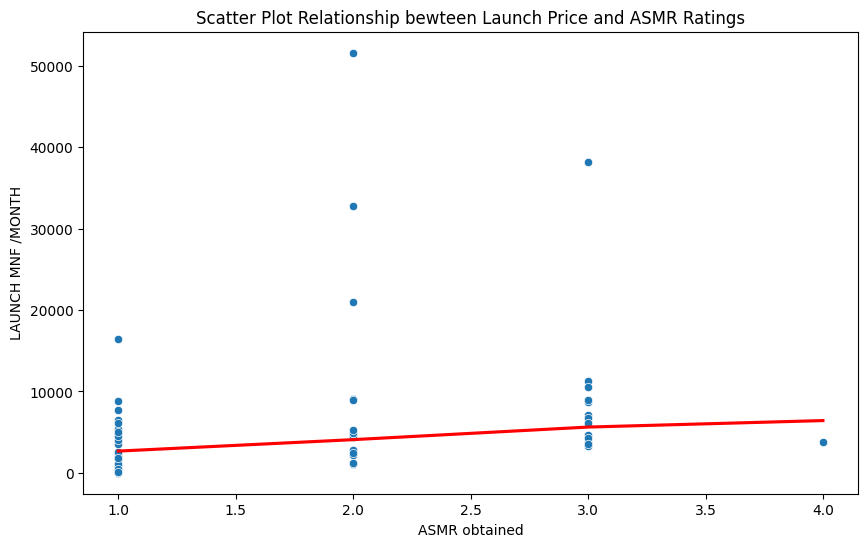

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_list is your DataFrame and contains the columns 'ASMR obtained' and 'LAUNCH MNF /MONTH'

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ASMR obtained', y='LAUNCH MNF /MONTH', data=new_df)

# Add a lowess smoother to visualize the monotonic relationship
sns.regplot(x='ASMR obtained', y='LAUNCH MNF /MONTH', data=new_df, scatter=False, color='red', lowess=True)

plt.title('Scatter Plot Relationship bewteen Launch Price and ASMR Ratings')
plt.xlabel('ASMR obtained')
plt.ylabel('LAUNCH MNF /MONTH')
plt.show()


In [ ]:
import numpy as np
from scipy.stats import pearsonr

# Remove rows with NaNs or infinite values in 'Patient Number' or 'LAUNCH MNF /MONTH'
df_cleaned = new_df.dropna(subset=['Patient Number', 'LAUNCH MNF /MONTH'])  # Drop rows with NaNs
df_cleaned = new_df[np.isfinite(new_df['Patient Number']) & np.isfinite(df_cleaned['LAUNCH MNF /MONTH'])]  # Keep rows with finite numbers only

# Calculate the Pearson correlation coefficient and p-value on the cleaned data
pearson_corr, p_value = pearsonr(df_cleaned['Patient Number'], df_cleaned['LAUNCH MNF /MONTH'])

print(f"Pearson correlation coefficient between 'Patient Number' and 'LAUNCH MNF /MONTH': {pearson_corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient between 'Patient Number' and 'LAUNCH MNF /MONTH': -0.2709326795255155
P-value: 0.04542129142588549


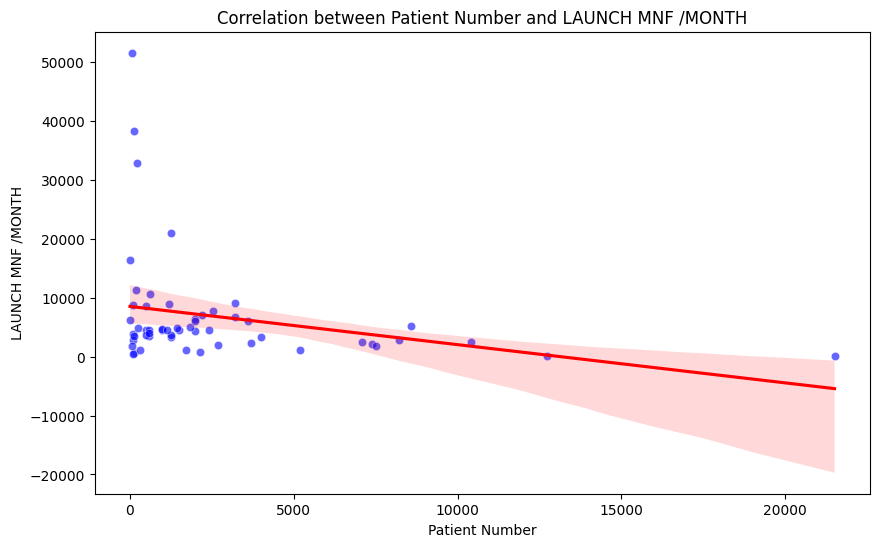

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.scatterplot(x='Patient Number', y='LAUNCH MNF /MONTH', data=df_cleaned, color='blue', alpha=0.6)
sns.regplot(x='Patient Number', y='LAUNCH MNF /MONTH', data=df_cleaned, scatter=False, color='red')

plt.title('Correlation between Patient Number and LAUNCH MNF /MONTH')
plt.xlabel('Patient Number')
plt.ylabel('LAUNCH MNF /MONTH')
plt.show()

In [ ]:
import statsmodels.api as sm
X = new_df['Orphan Status']
y = new_df['LAUNCH MNF /MONTH']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      LAUNCH MNF /MONTH   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     5.849
Date:                Sun, 04 Feb 2024   Prob (F-statistic):             0.0185
Time:                        14:55:35   Log-Likelihood:                -668.62
No. Observations:                  64   AIC:                             1341.
Df Residuals:                      62   BIC:                             1346.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4968.4400   1174.413      4.231

In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr

y = new_df['MNF /MONTH']
independent_vars = ['Orphan Status','First line', 'Second line', 'Third line', 'Rescue line', 'Unmet Need Binary']

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Variable', 'Point-Biserial Correlation', 'P-value'])

for var in independent_vars:
    # Create a temporary DataFrame dropping NaNs in 'y' and the current 'var'
    temp_df = new_df[[var, 'MNF /MONTH']].dropna()

    # Check if the temp_df is not empty to avoid ValueError
    if not temp_df.empty:
        # Compute the Point-Biserial correlation and p-value
        correlation, p_value = pointbiserialr(temp_df[var], temp_df['MNF /MONTH'])

        # Append the results to the DataFrame
        results = results.append({'Variable': var,
                                  'Point-Biserial Correlation': correlation,
                                  'P-value': p_value}, ignore_index=True)
    else:
        # Append NaNs if the DataFrame is empty
        results = results.append({'Variable': var,
                                  'Point-Biserial Correlation': np.nan,
                                  'P-value': np.nan}, ignore_index=True)

# Display the results
print(results)


            Variable  Point-Biserial Correlation   P-value
0      Orphan Status                    0.321578  0.010814
1         First line                   -0.043222  0.738714
2        Second line                    0.284427  0.025059
3         Third line                    0.109935  0.394994
4        Rescue line                   -0.104740  0.417841
5  Unmet Need Binary                    0.155313  0.228058


<ipython-input-26-b409284b2163>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var,
<ipython-input-26-b409284b2163>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var,
<ipython-input-26-b409284b2163>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var,
<ipython-input-26-b409284b2163>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var,
<ipython-input-26-b409284b2163>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

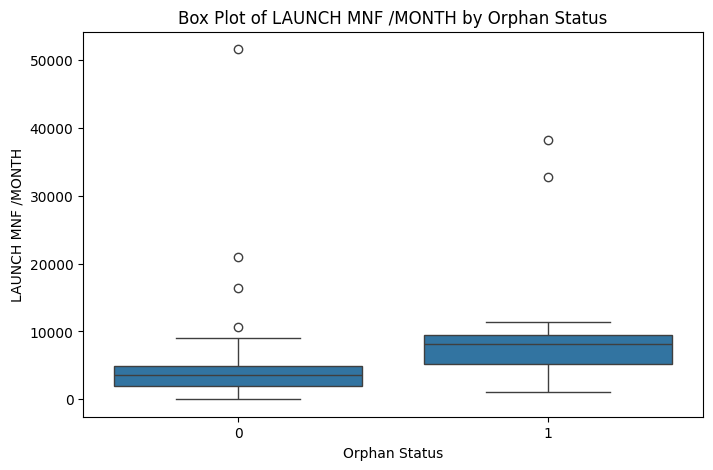

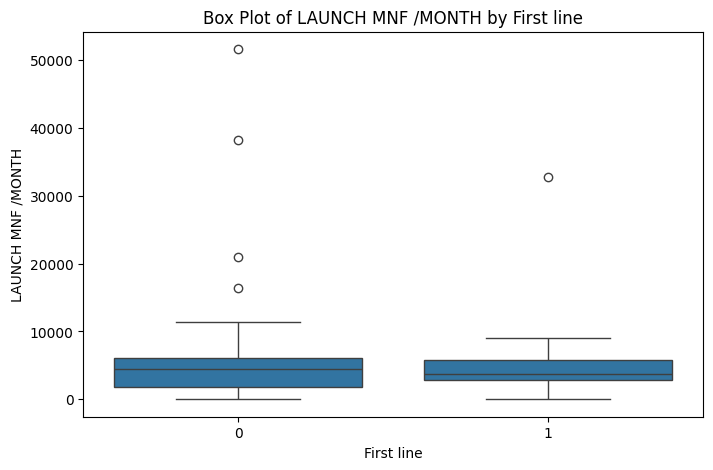

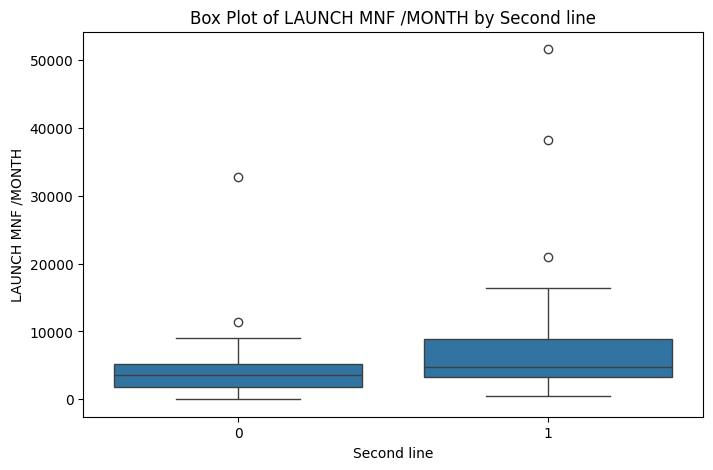

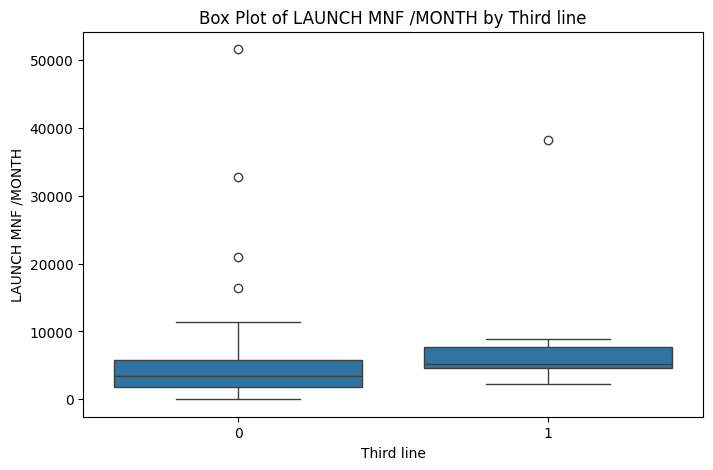

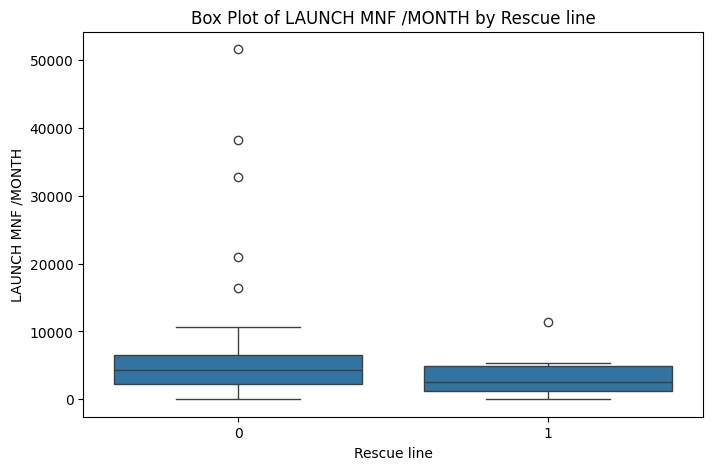

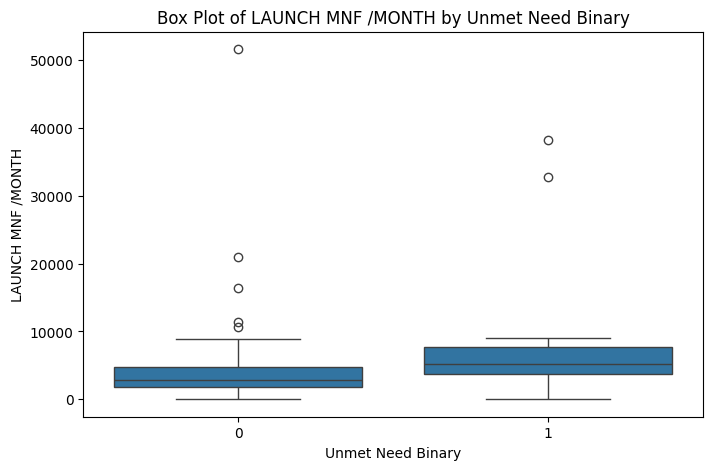

In [ ]:

# Your dependent variable
y_var = 'LAUNCH MNF /MONTH'

# Create a box plot for each independent variable
for var in independent_vars:
    plt.figure(figsize=(8, 5))  # Set the figure size for better readability
    sns.boxplot(x=var, y=y_var, data=new_df)

    plt.title(f'Box Plot of {y_var} by {var}')
    plt.xlabel(var)
    plt.ylabel(y_var)

    # Display the plot
    plt.show()

In [ ]:
from itertools import combinations


# Your independent variables
independent_vars = ['ASMR obtained', 'Orphan Status', 'Patient Number', 'First line', 'Rescue line', 'Second line', 'Third line', 'Unmet Need Binary']

# Dependent variable
y = new_df['LAUNCH MNF /MONTH']

# Generate all possible combinations of two independent variables
combinations_of_vars = combinations(independent_vars, 2)

# Loop through each combination and fit a linear regression model
for combination in combinations_of_vars:
    var1, var2 = combination  # Unpack the tuple

    # Preparing the DataFrame for regression
    X = new_df[[var1, var2]]
    X_with_constant = sm.add_constant(X)  # Adding a constant to the model

    # Fit the regression model
    model = sm.OLS(y, X_with_constant, missing='drop').fit()

    # Print the summary of the regression
    print(f"Regression results for {var1} and {var2}:")
    print(model.summary())
    print("\n\n")

Regression results for ASMR obtained and Orphan Status:
                            OLS Regression Results                            
Dep. Variable:      LAUNCH MNF /MONTH   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     4.736
Date:                Sun, 04 Feb 2024   Prob (F-statistic):             0.0122
Time:                        14:55:37   Log-Likelihood:                -666.89
No. Observations:                  64   AIC:                             1340.
Df Residuals:                      61   BIC:                             1346.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm

# Assuming new_df is your DataFrame and has been defined previously
X = new_df[['ASMR obtained', 'Orphan Status', 'Patient Number', 'First line', 'Rescue line',
            'Second line', 'Third line', 'Unmet Need Binary']]
y = new_df['LAUNCH MNF /MONTH']

# Drop rows with NaNs in either X or y
cleaned_df = new_df.dropna(subset=['ASMR obtained', 'Orphan Status', 'Patient Number', 'First line', 'Rescue line',
                                  'Second line', 'Third line', 'Unmet Need Binary', 'LAUNCH MNF /MONTH'])

# Redefine X and y with cleaned data
X_clean = cleaned_df[['ASMR obtained', 'Orphan Status', 'Patient Number', 'First line', 'Rescue line',
                      'Second line', 'Third line', 'Unmet Need Binary']]
y_clean = cleaned_df['LAUNCH MNF /MONTH']

# Fit the OLS model
model = sm.OLS(y_clean, X_clean).fit()

# Print the summary of the model
print(model.summary())



                                 OLS Regression Results                                
Dep. Variable:      LAUNCH MNF /MONTH   R-squared (uncentered):                   0.496
Model:                            OLS   Adj. R-squared (uncentered):              0.410
Method:                 Least Squares   F-statistic:                              5.785
Date:                Sun, 04 Feb 2024   Prob (F-statistic):                    3.86e-05
Time:                        14:55:37   Log-Likelihood:                         -573.17
No. Observations:                  55   AIC:                                      1162.
Df Residuals:                      47   BIC:                                      1178.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
X = cleaned_df[['ASMR obtained', 'Orphan Status', 'Patient Number', 'First line', 'Rescue line',
        'Second line', 'Third line', 'Unmet Need Binary']]
y = cleaned_df['LAUNCH MNF /MONTH']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      LAUNCH MNF /MONTH   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1.619
Date:                Sun, 04 Feb 2024   Prob (F-statistic):              0.146
Time:                        14:55:38   Log-Likelihood:                -573.12
No. Observations:                  55   AIC:                             1164.
Df Residuals:                      46   BIC:                             1182.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1388.9119   4564.04

# Log Transformation

In [ ]:
cleaned_df['MNF /MONTH'] = np.log(cleaned_df['MNF /MONTH'] + 1)
cleaned_df['LAUNCH MNF /MONTH'] = np.log(cleaned_df['LAUNCH MNF /MONTH'] + 1)
cleaned_df['Patient Number'] = np.log(cleaned_df['Patient Number'] + 1)

<ipython-input-31-3cded4100eb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['MNF /MONTH'] = np.log(cleaned_df['MNF /MONTH'] + 1)
<ipython-input-31-3cded4100eb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['LAUNCH MNF /MONTH'] = np.log(cleaned_df['LAUNCH MNF /MONTH'] + 1)
<ipython-input-31-3cded4100eb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
# List of independent variables
independent_vars = ['ASMR obtained', 'Orphan Status', 'Patient Number', 'First line', 'Rescue line', 'Second line', 'Third line', 'Unmet Need Binary']

# Loop through each independent variable and perform a simple linear regression
for var in independent_vars:
    # Define the independent variable (X) and dependent variable (y)
    X = cleaned_df[[var]]
    y = cleaned_df['LAUNCH MNF /MONTH']

    # Adding a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Print the summary of the model for each independent variable
    print(f"Regression Results for {var}:\n")
    print(model.summary())
    print("\n\n")

Regression Results for ASMR obtained:

                            OLS Regression Results                            
Dep. Variable:      LAUNCH MNF /MONTH   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     8.191
Date:                Sun, 04 Feb 2024   Prob (F-statistic):            0.00602
Time:                        14:55:38   Log-Likelihood:                -83.407
No. Observations:                  55   AIC:                             170.8
Df Residuals:                      53   BIC:                             174.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [ ]:
# Calculate the Pearson correlation coefficient and p-value on the cleaned data
pearson_corr, p_value = pearsonr(cleaned_df['Patient Number'], cleaned_df['LAUNCH MNF /MONTH'])

print(f"Pearson correlation coefficient between 'Patient Number' and 'LAUNCH MNF /MONTH': {pearson_corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient between 'Patient Number' and 'LAUNCH MNF /MONTH': -0.3808037410584198
P-value: 0.004128476184168401


In [ ]:
# Convert the columns to numeric, assuming NaN for non-numeric entries
cleaned_df['ASMR obtained'] = pd.to_numeric(cleaned_df['ASMR obtained'], errors='coerce')
cleaned_df['LAUNCH MNF /MONTH'] = pd.to_numeric(cleaned_df['LAUNCH MNF /MONTH'], errors='coerce')

# Drop rows where either column is NaN
cleaned_df.dropna(subset=['ASMR obtained', 'LAUNCH MNF /MONTH'], inplace=True)

# Calculate Spearman rank correlation
spearman_corr, p_value = spearmanr(cleaned_df['ASMR obtained'], cleaned_df['LAUNCH MNF /MONTH'])

print(f"Spearman correlation coefficient between 'ASMR obtained' and 'LAUNCH MNF /MONTH': {spearman_corr}")
print(f"P-value: {p_value}")

Spearman correlation coefficient between 'ASMR obtained' and 'LAUNCH MNF /MONTH': 0.3406670099166286
P-value: 0.010926134757282555


<ipython-input-34-e9faf558d0a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['ASMR obtained'] = pd.to_numeric(cleaned_df['ASMR obtained'], errors='coerce')
<ipython-input-34-e9faf558d0a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['LAUNCH MNF /MONTH'] = pd.to_numeric(cleaned_df['LAUNCH MNF /MONTH'], errors='coerce')
<ipython-input-34-e9faf558d0a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

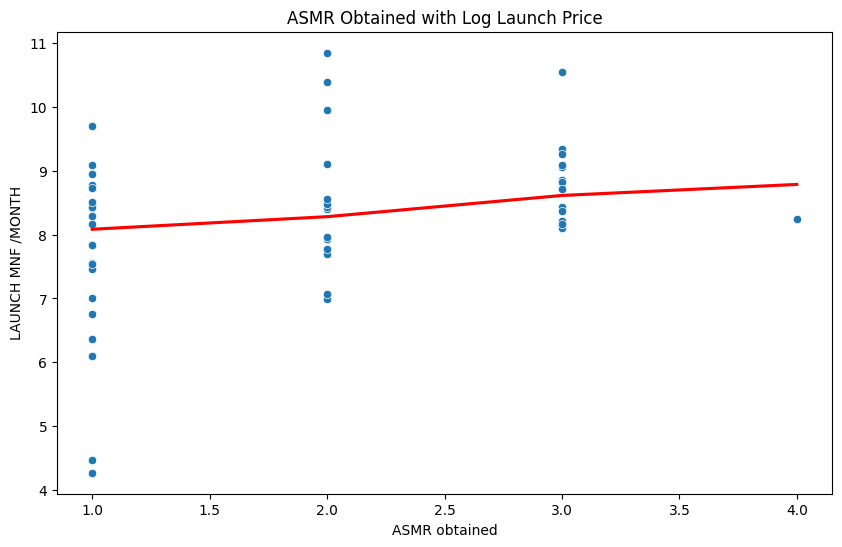

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ASMR obtained', y='LAUNCH MNF /MONTH', data=cleaned_df)

# Add a lowess smoother to visualize the monotonic relationship
sns.regplot(x='ASMR obtained', y='LAUNCH MNF /MONTH', data=cleaned_df, scatter=False, color='red', lowess=True)

plt.title('ASMR Obtained with Log Launch Price')
plt.xlabel('ASMR obtained')
plt.ylabel('LAUNCH MNF /MONTH')
plt.show()

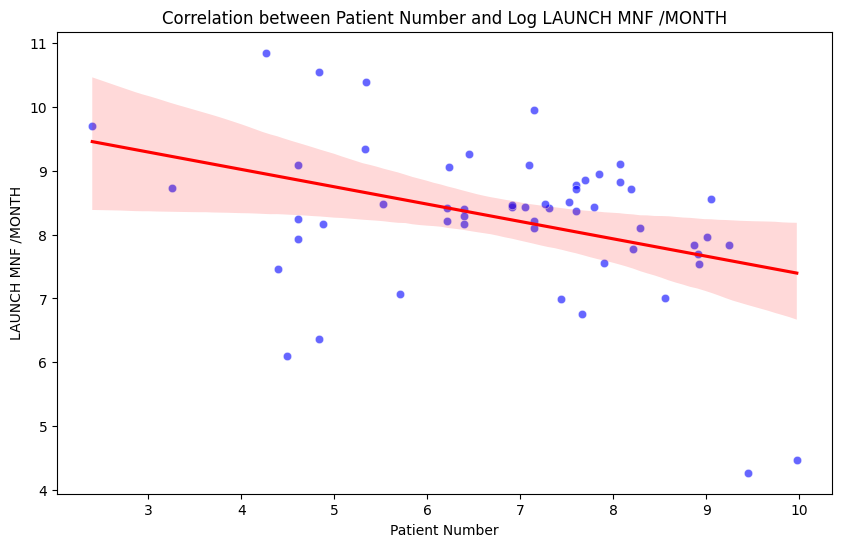

In [ ]:


# Assuming df_cleaned is your cleaned DataFrame without NaNs and infs
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.scatterplot(x='Patient Number', y='LAUNCH MNF /MONTH', data=cleaned_df, color='blue', alpha=0.6)
sns.regplot(x='Patient Number', y='LAUNCH MNF /MONTH', data=cleaned_df, scatter=False, color='red')

plt.title('Correlation between Patient Number and Log LAUNCH MNF /MONTH')
plt.xlabel('Patient Number')
plt.ylabel('LAUNCH MNF /MONTH')
plt.show()

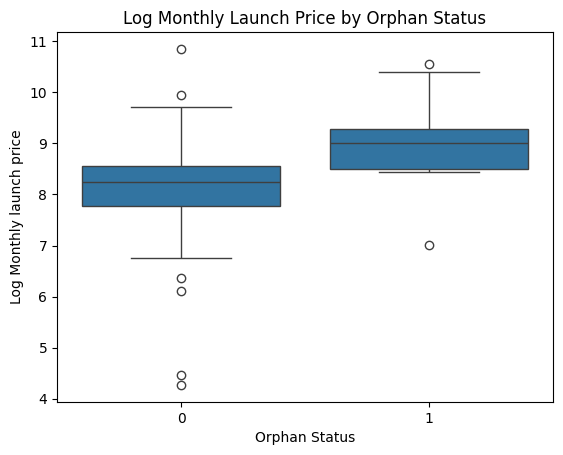

In [ ]:
sns.boxplot(x='Orphan Status', y='LAUNCH MNF /MONTH', data=cleaned_df)

# Adding titles and labels for clarity
plt.title('Log Monthly Launch Price by Orphan Status')
plt.xlabel('Orphan Status')
plt.ylabel('Log Monthly launch price')

plt.show()

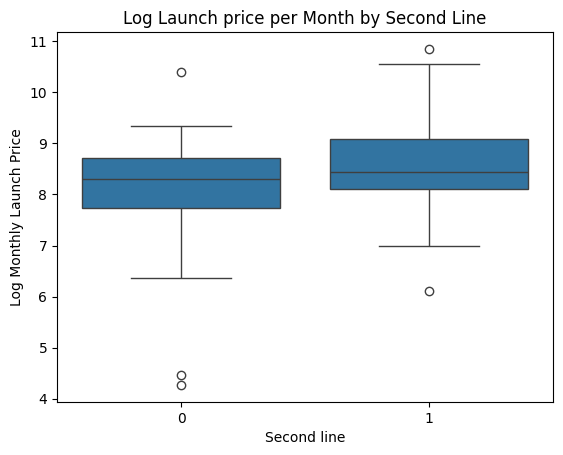

In [ ]:
sns.boxplot(x='Second line', y='LAUNCH MNF /MONTH', data=cleaned_df)

# Adding titles and labels for clarity
plt.title('Log Launch price per Month by Second Line')
plt.xlabel('Second line')
plt.ylabel('Log Monthly Launch Price')

plt.show()

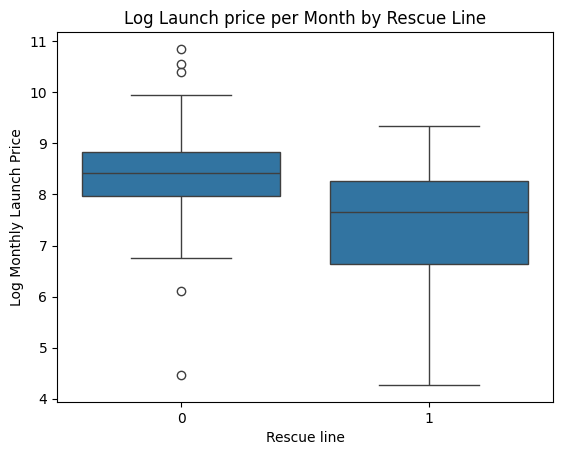

In [ ]:
sns.boxplot(x='Rescue line', y='LAUNCH MNF /MONTH', data=cleaned_df)

# Adding titles and labels for clarity
plt.title('Log Launch price per Month by Rescue Line')
plt.xlabel('Rescue line')
plt.ylabel('Log Monthly Launch Price')

plt.show()

In [ ]:

y = cleaned_df['LAUNCH MNF /MONTH']  # Your dependent variable

# List of independent binary variables
independent_vars = ['Orphan Status', 'First line', 'Rescue line', 'Second line', 'Third line', 'Unmet Need Binary']

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Variable', 'Point-Biserial Correlation', 'P-value'])

for var in independent_vars:
    # Compute the Point-Biserial correlation and p-value
    correlation, p_value = pointbiserialr(cleaned_df[var], y)

    # Append the results to the DataFrame
    results = results.append({'Variable': var,
                              'Point-Biserial Correlation': correlation,
                              'P-value': p_value}, ignore_index=True)
print(results)

            Variable  Point-Biserial Correlation   P-value
0      Orphan Status                    0.299483  0.026333
1         First line                   -0.041142  0.765524
2        Rescue line                   -0.285679  0.034492
3        Second line                    0.231153  0.089511
4         Third line                    0.204688  0.133857
5  Unmet Need Binary                    0.127926  0.351975


<ipython-input-36-59943f866175>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var,
<ipython-input-36-59943f866175>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var,
<ipython-input-36-59943f866175>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var,
<ipython-input-36-59943f866175>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var,
<ipython-input-36-59943f866175>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [ ]:
X = cleaned_df[['ASMR obtained', 'Orphan Status', 'Patient Number','Second line']]
y = cleaned_df['LAUNCH MNF /MONTH']


# Create a model and fit it
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      LAUNCH MNF /MONTH   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              246.6
Date:                Sun, 04 Feb 2024   Prob (F-statistic):                    1.09e-32
Time:                        15:09:01   Log-Likelihood:                         -111.79
No. Observations:                  55   AIC:                                      231.6
Df Residuals:                      51   BIC:                                      239.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
X = cleaned_df[['ASMR obtained', 'Orphan Status', 'Patient Number','Second line', 'Rescue line']]
y = cleaned_df['LAUNCH MNF /MONTH']


# Create a model and fit it
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      LAUNCH MNF /MONTH   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              197.1
Date:                Sun, 04 Feb 2024   Prob (F-statistic):                    1.17e-31
Time:                        15:08:47   Log-Likelihood:                         -111.30
No. Observations:                  55   AIC:                                      232.6
Df Residuals:                      50   BIC:                                      242.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
X = cleaned_df[['ASMR obtained', 'Orphan Status', 'Patient Number','Second line']]
y = cleaned_df['LAUNCH MNF /MONTH']


X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant).fit()

# Print the summary of the regression
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:      LAUNCH MNF /MONTH   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     7.445
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           8.73e-05
Time:                        14:55:38   Log-Likelihood:                -74.509
No. Observations:                  55   AIC:                             159.0
Df Residuals:                      50   BIC:                             169.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.3766      0.698     11.

<ipython-input-40-521adadd3cff>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['predicted'] = results.fittedvalues


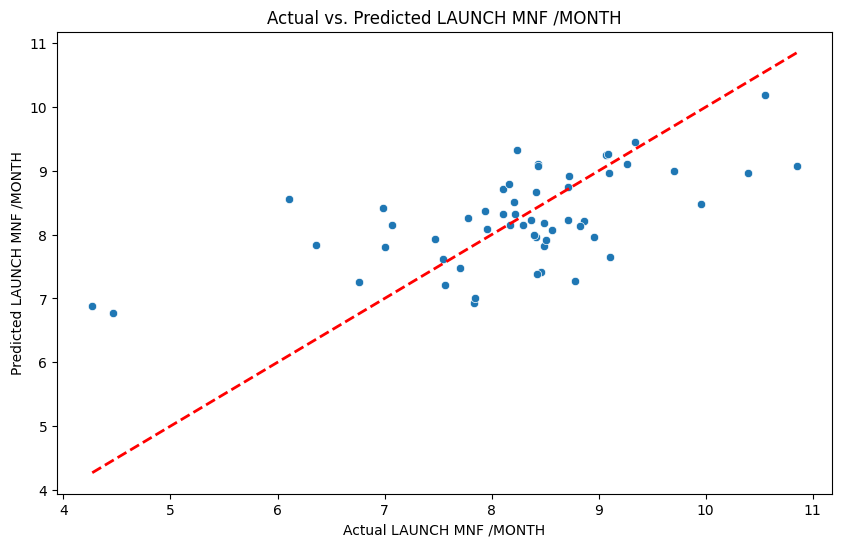

In [ ]:
import statsmodels.api as sm


# Replace 'X' and 'Y' with the actual column names or variables you used for the regression
X = cleaned_df[['ASMR obtained', 'Orphan Status', 'Patient Number', 'Second line']]  # Independent variables
Y = cleaned_df['LAUNCH MNF /MONTH']  # Dependent variable

# Adding a constant term to the model (if you need it)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X)
results = model.fit()

# Now, you can use the fitted model to predict and plot
cleaned_df['predicted'] = results.fittedvalues

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y, y=cleaned_df['predicted'])
plt.xlabel('Actual LAUNCH MNF /MONTH')
plt.ylabel('Predicted LAUNCH MNF /MONTH')
plt.title('Actual vs. Predicted LAUNCH MNF /MONTH')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', lw=2, linestyle='--')  # Reference line
plt.show()

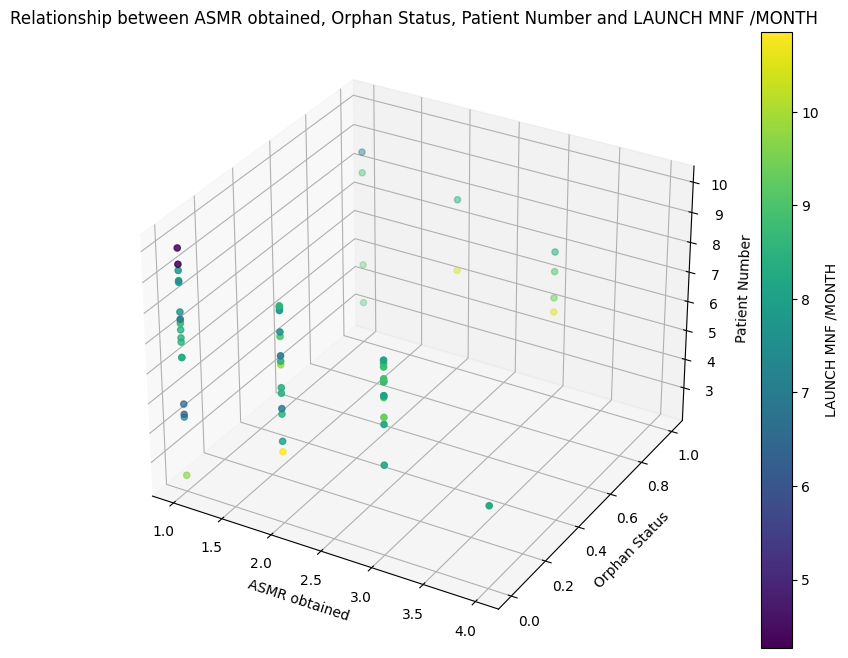

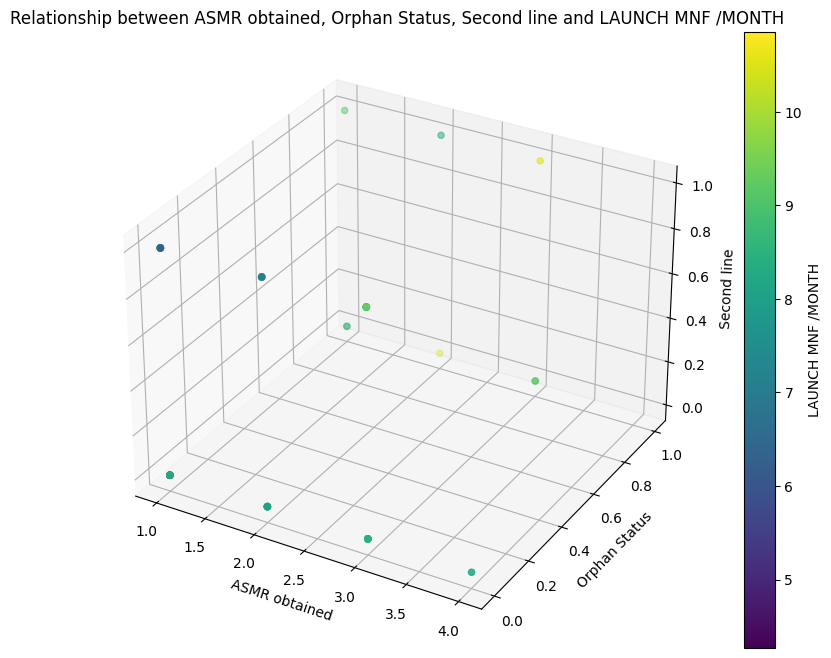

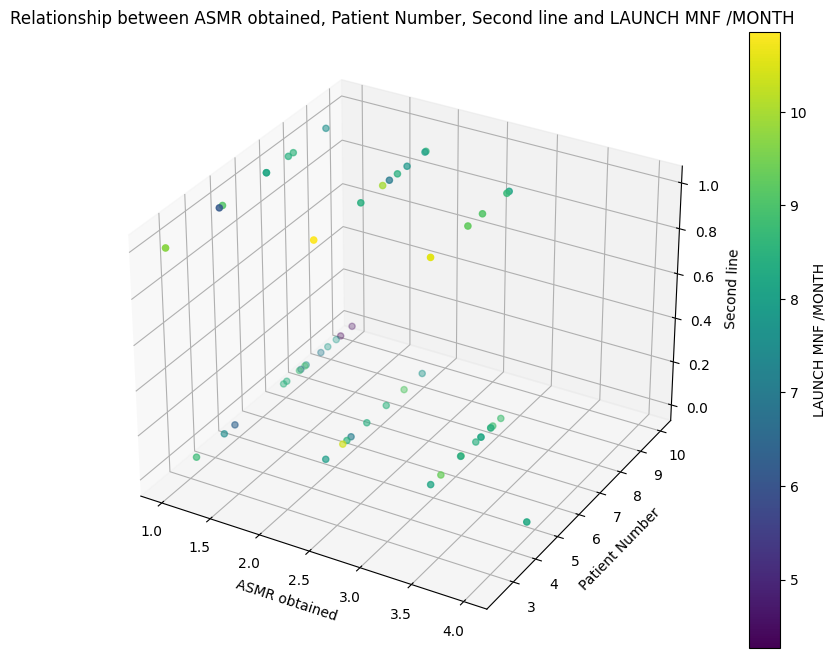

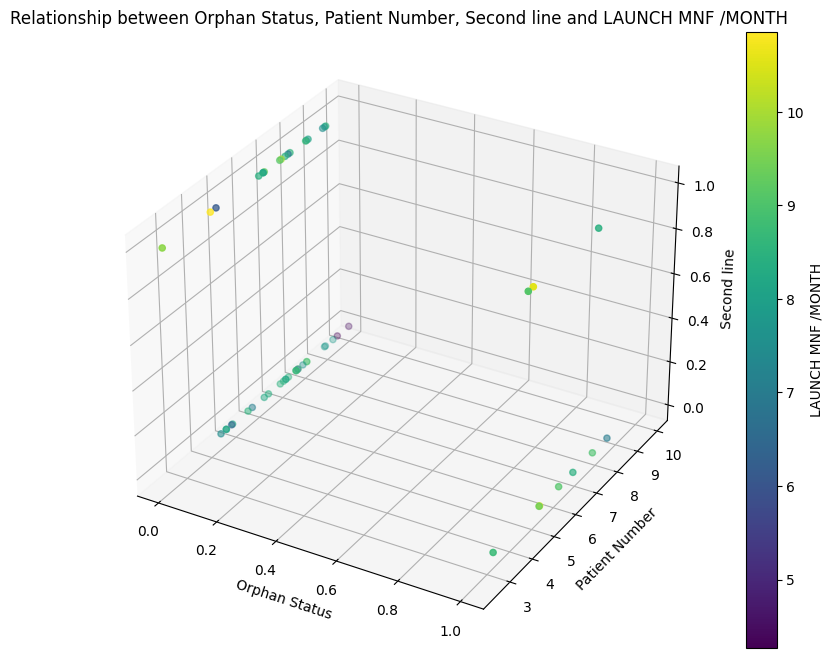

In [ ]:
y = 'LAUNCH MNF /MONTH'
independent_vars = independent_vars = ['ASMR obtained', 'Orphan Status', 'Patient Number', 'Second line' ]
# Generate all possible combinations of three independent variables
combinations_of_vars = combinations(independent_vars, 3)

# Loop through each combination and create 3D scatter plots
for combination in combinations_of_vars:
    var1, var2, var3 = combination  # Unpack the tuple

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    sc = ax.scatter(cleaned_df[var1], cleaned_df[var2], cleaned_df[var3], c=cleaned_df[y], cmap='viridis')

    # Labeling
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_zlabel(var3)
    ax.set_title(f'Relationship between {var1}, {var2}, {var3} and {y}')

    # Color bar
    cbar = plt.colorbar(sc)
    cbar.set_label(y)

    plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np

# For cross-validation
from sklearn.model_selection import KFold

# Assuming df_list is your DataFrame and has been previously defined and cleaned
X = cleaned_df[['ASMR obtained', 'Orphan Status', 'Patient Number', 'Second line']].values  # Independent variables
y = cleaned_df['LAUNCH MNF /MONTH'].values  # Dependent variable

# Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for name, model in models.items():
    # Negative RMSE scores
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
    print(f'{name} CV RMSE:', -np.mean(cv_scores), 'CV Std:', np.std(cv_scores))

    # Fit the model
    model.fit(X, y)
    # Predictions
    y_pred = model.predict(X)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f'{name} RMSE:', rmse)

LinearRegression CV RMSE: 0.9528314076621276 CV Std: 0.26970757499071524
LinearRegression RMSE: 0.9377882822301637
Ridge CV RMSE: 0.94664654039067 CV Std: 0.2786495013606248
Ridge RMSE: 0.9386869758456362
Lasso CV RMSE: 1.1379791797185785 CV Std: 0.38952131546657415
Lasso RMSE: 1.1845941841867662
ElasticNet CV RMSE: 1.1102834598382754 CV Std: 0.39665227017928956
ElasticNet RMSE: 1.1423777360504161


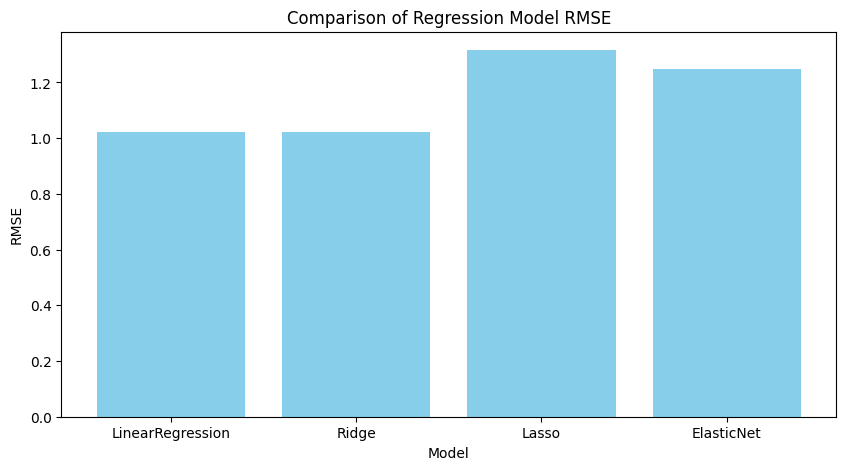

In [ ]:
import matplotlib.pyplot as plt

# RMSE values for each model
rmse_values = {
    'LinearRegression': 1.0205159794380458,
    'Ridge': 1.0215896631947976,
    'Lasso': 1.3162679341827344,
    'ElasticNet': 1.2466602084778475
}

# Create lists for the plot
models = list(rmse_values.keys())
rmse = list(rmse_values.values())

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(models, rmse, color='skyblue')

# Add title and labels
plt.title('Comparison of Regression Model RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')

# Display plot
plt.show()


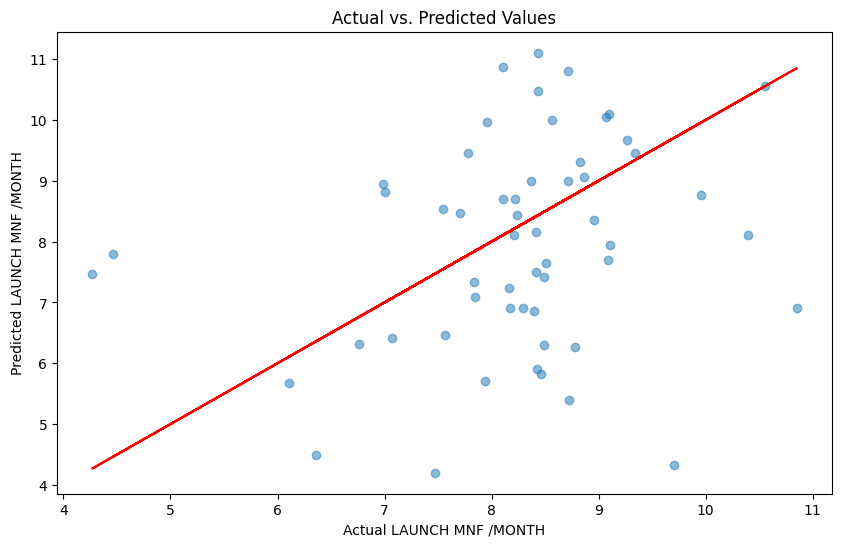

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming X and y are already defined with the correct values:
X = cleaned_df[['ASMR obtained', 'Orphan Status', 'Patient Number', 'Second line']]  # Predictor variables
y = cleaned_df['LAUNCH MNF /MONTH']  # Dependent variable

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.plot(y, y, color="red") # A line showing the perfect fit
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual LAUNCH MNF /MONTH')
plt.ylabel('Predicted LAUNCH MNF /MONTH')
plt.show()

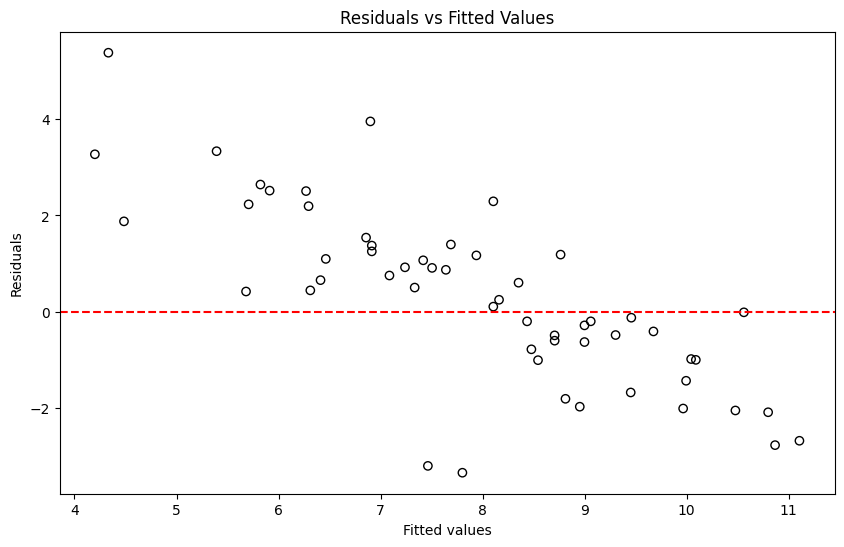

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming your model is already fitted and named 'model'
# Calculate residuals
residuals = model.resid

# Calculate fitted values
fitted = model.fittedvalues

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, edgecolors='k', facecolors='none')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


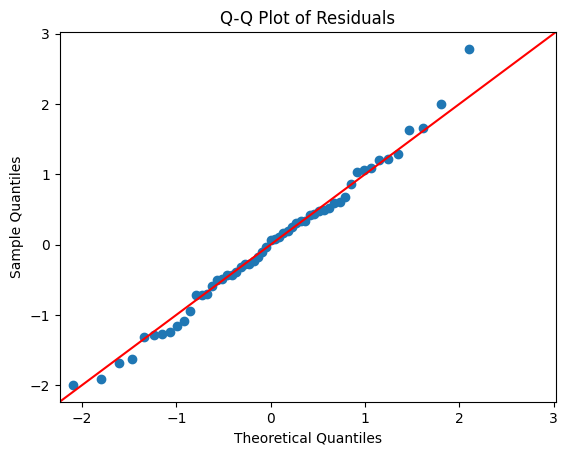

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you already have a fitted model named 'model'
residuals = model.resid

# Generate a Q-Q plot
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()
